# ANN for digits classification

## Import modules

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

## EDA

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0:2]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
x_train[0][10]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
        90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [11]:
x_train[0][10][10]

1

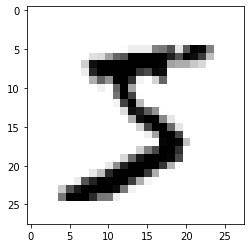

In [12]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [13]:
y_train[0]

5

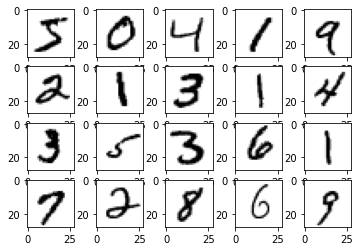

In [14]:
rows, cols = (4,5)
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    # print(y_train[i])

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

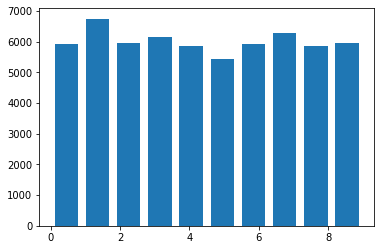

In [43]:
plt.hist(y_train,bins=10,rwidth=0.75)

(array([ 980., 1135., 1032., 1010.,  982.,  892.,  958., 1028.,  974.,
        1009.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

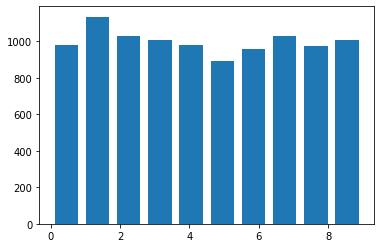

In [41]:
plt.hist(y_test,bins=10,rwidth=0.75)

## Data Pre-processing

In [15]:
x_train_flat = x_train.reshape((len(x_train),28*28))
x_test_flat = x_test.reshape(len(x_test),28*28)

### Pre-processed data checks

In [16]:
x_train_flat.shape

(60000, 784)

In [17]:
x_train_flat[0].shape

(784,)

In [18]:
x_train_flat[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [19]:
x_test_flat.shape

(10000, 784)

In [20]:
x_test_flat[0].shape

(784,)

In [21]:
x_test_flat[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Model - ANN

In [22]:
# create a sequential model
model = keras.Sequential([
    keras.layers.Rescaling(scale=1./255,input_shape=(784,)),
    keras.layers.Dense(512,activation=tf.nn.relu),
    keras.layers.Dense(256,activation=tf.nn.relu),
    keras.layers.Dense(64,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.sigmoid)
])

In [23]:
# compile: configure the model for training
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# fit: train the model 
model.fit(x_train_flat,y_train,epochs=12,batch_size=100)

Epoch 1/12
600/600 [==============================] - 3s 5ms/step - loss: 0.2531 - accuracy: 0.9246
Epoch 2/12
600/600 [==============================] - 3s 5ms/step - loss: 0.0928 - accuracy: 0.9718
Epoch 3/12
600/600 [==============================] - 3s 5ms/step - loss: 0.0587 - accuracy: 0.9816
Epoch 4/12
600/600 [==============================] - 3s 5ms/step - loss: 0.0450 - accuracy: 0.9857
Epoch 5/12
600/600 [==============================] - 3s 5ms/step - loss: 0.0336 - accuracy: 0.9888
Epoch 6/12
600/600 [==============================] - 3s 5ms/step - loss: 0.0290 - accuracy: 0.9903
Epoch 7/12
600/600 [==============================] - 3s 5ms/step - loss: 0.0244 - accuracy: 0.9923
Epoch 8/12
600/600 [==============================] - 3s 5ms/step - loss: 0.0186 - accuracy: 0.9939
Epoch 9/12
600/600 [==============================] - 3s 4ms/step - loss: 0.0218 - accuracy: 0.9929
Epoch 10/12
600/600 [==============================] - 3s 5ms/step - loss: 0.0164 - accuracy: 0.9945

## Model summary

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 550,346
Trainable params: 550,346
Non-trainable params: 0
_________________________________________________________________


## Model evaluation

In [26]:
model.metrics_names

['loss', 'accuracy']

In [27]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1127 - accuracy: 0.9757


[0.11268608272075653, 0.9757000207901001]

## Prediction

In [28]:
y_pred = model.predict(x_test_flat)

In [29]:
y_pred[0]

array([4.2121198e-10, 8.8354097e-09, 5.0168358e-10, 2.7561839e-08,
       8.2408919e-10, 2.8749814e-10, 2.0458666e-09, 9.9989021e-01,
       7.5777093e-12, 5.0440804e-06], dtype=float32)

In [30]:
np.argmax(y_pred[0])

7

In [31]:
y_test[0]

7

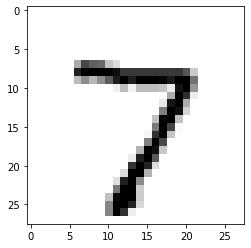

In [32]:
plt.imshow(x_test[0],cmap=plt.cm.binary)

## Save and Export Model

https://www.tensorflow.org/guide/keras/serialization_and_saving#how_to_save_and_load_a_model

In [33]:
model.save("model.h5",save_format='h5')

### tfjs convertor

In [34]:
import tensorflowjs as tfjs

In [35]:
!tensorflowjs_converter --input_format keras model.h5 ../tfjs_artifacts/